### Note -  This code has been majorly inspired by this website [here](https://scipython.com/blog/visualizing-the-gradient-descent-method/).

I have re-used a part of the code and I acknowledge it.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.animation import Animation

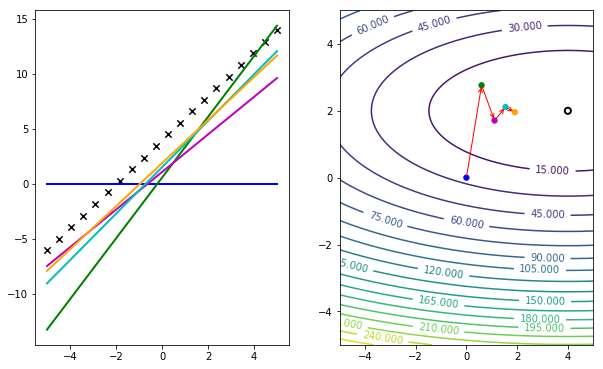

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time

number_of_samples = 20
theta0_final = 4
theta1_final = 2

x = np.linspace(-5,5,20)
y = theta0_final+ theta1_final * x


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def loss(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-(theta0+theta1*x))**2, axis=2)/2

def predicted(x,theta0,theta1):
    return theta0+ theta1*x
theta0_grid = np.linspace(-5,5,101)
theta1_grid = np.linspace(-5,5,101)

grid_error = loss(theta0_grid[np.newaxis,:,np.newaxis],theta1_grid[:,np.newaxis,np.newaxis])

X, Y = np.meshgrid(theta0_grid, theta1_grid)

contours = ax[1].contour(X, Y, grid_error, 20)
ax[1].clabel(contours)
ax[1].scatter([theta0_final]*2,[theta1_final]*2,s=[50,10], color=['k','w'])

N = 5
alpha = 0.15
theta = [np.array((0,0))]
J = [loss(*theta[0])[0]]
for j in range(N-1):
    prev_theta = theta[-1]
    curr_theta = np.empty((2,))
    curr_theta[0] = prev_theta[0] - alpha*np.sum(predicted(x,*prev_theta) - y)*(1/number_of_samples)
    curr_theta[1] = prev_theta[1] - alpha*np.sum((predicted(x, *prev_theta) - y) * x)*(1/number_of_samples)
    theta.append(curr_theta)
    J.append(loss(*curr_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, predicted(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1], arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},va='center', ha='center')
    ax[0].plot(x, predicted(x, *theta[j]), color=colors[j], lw=2,label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)
plt.show()
# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()